# Task-03: Sales Data Analysis
# Author: Ferzeen Tahir

### Introduction:

#### Objective:
The objective of this analysis is to examine sales data to uncover trends and insights that can inform business strategies. By analyzing key metrics such as revenue, price, quantity, and category over time, we aim to understand sales performance, identify popular products, and assess the impact of different categories on overall revenue. 

#### Dataset:
The dataset used for this analysis is the "Sales_Data.csv," which contains detailed sales transactions for a variety of products. The dataset comprises 369 rows and 6 columns. The columns included in the dataset are:
- **date**: The date of the sale (in YYYY-MM-DD format).
- **product**: The name of the product sold.
- **category**: The category of the product (e.g. "Electronics", "Clothing", etc).
- **price**: The price of the product (in USD).
- **quantity**: The quantity of the product sold.
- **revenue**: The total revenue generated by the sale.

## Step-01: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step-02: Load Data

In [2]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

## Step-03: Data Inspection

In [3]:
# Display the first five rows of the dataset
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
# Display the last five rows of the dataset
df.tail()

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


In [5]:
# Display the shape of the dataset (rows, columns)
df.shape

(369, 6)

In [6]:
# Provide summary statistics of the dataset
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [7]:
# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


## Step-04: Data Cleaning

### Handle Missing Values

In [8]:
# Check for missing values in each column
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [9]:
# Fill missing 'price' values for specific products
df.loc[df['product'] == 'Watch', 'price'] = df.loc[df['product'] == 'Watch', 'price'].fillna(150)
df.loc[df['product'] == 'Wallet', 'price'] = df.loc[df['product'] == 'Wallet', 'price'].fillna(30)

In [10]:
# Fill missing 'quantity' values with 11
df['quantity'].fillna(11, inplace = True)

In [11]:
# Fill missing 'revenue' values with 2000
df['revenue'].fillna(2000, inplace = True)

In [12]:
# Verify that all missing values have been handled
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

### Changing Data Types

In [13]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert 'price', 'quantity', and 'revenue' to integer type
df['price'] = df['price'].astype(int)
df['quantity'] = df['quantity'].astype(int)
df['revenue'] = df['revenue'].astype(int)

In [14]:
# Verify data types have been correctly converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     369 non-null    int32         
 4   quantity  369 non-null    int32         
 5   revenue   369 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 13.1+ KB


### Correcting Category Names

In [15]:
# Correct misspelled category names
category_corrections = {
    'Bgas': 'Bags',
    'Clohting': 'Clothing',
    'Shoeses': 'Shoes'
}

df['category'] = df['category'].replace(category_corrections)


### Handling Duplicates

In [16]:
# Check for duplicate rows
df.duplicated().sum()

1

In [17]:
# Drop duplicate rows
df.drop_duplicates(inplace = True)

In [18]:
# Verify that duplicates have been removed
df.duplicated().sum()

0

## Step-05: Calculating Total Revenue

In [19]:
# Calculate the total revenue
total_revenue = df['revenue'].sum()
total_revenue

759130

## Step-06: Date Range

In [20]:
# Find the earliest date in the dataset
df['date'].min()

Timestamp('2022-01-01 00:00:00')

In [21]:
# Find the latest date in the dataset
df['date'].max()

Timestamp('2022-12-31 00:00:00')

## Step-07: Revenue Trend Analysis

In [23]:
# Extract month and year from the 'date' column
df['month_year'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

# Group by 'month_year' and calculate total revenue for each month
revenue_trend = df.groupby('month_year')['revenue'].sum().reset_index()
revenue_trend

,month_year,revenue
0,2022-01,65800
1,2022-02,53740
2,2022-03,62560
3,2022-04,57800
4,2022-05,69510
5,2022-06,58660
6,2022-07,69510
7,2022-08,65260
8,2022-09,62910
9,2022-10,65260


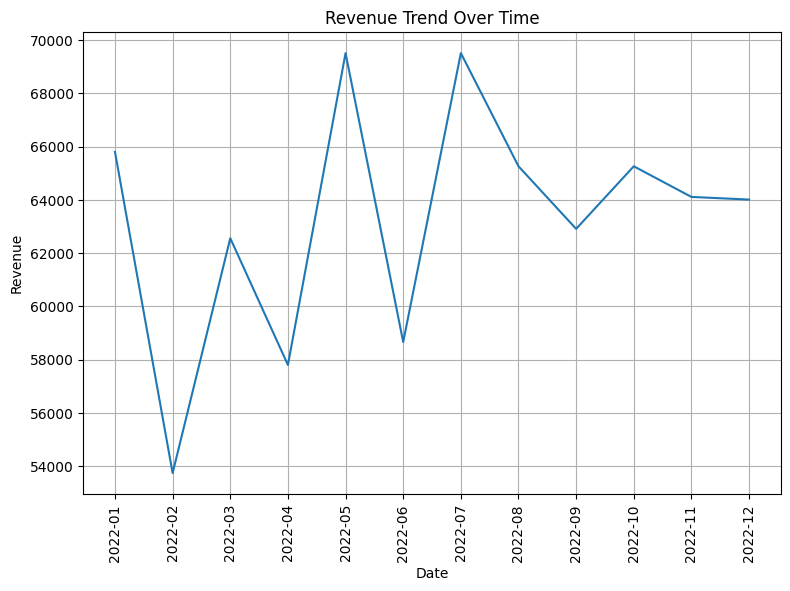

In [25]:
# Plot the revenue trend over time
plt.figure(figsize=(9, 6))
plt.plot(revenue_trend['month_year'], revenue_trend['revenue'])
plt.xticks(rotation = 90)
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## Step-08: Category Revenue Analysis

In [26]:
# Group by 'category' and calculate total revenue for each category
category_revenue = df.groupby('category')['revenue'].sum().reset_index()
category_revenue

,category,revenue
0,Accessories,106700
1,Bags,20400
2,Clothing,94350
3,Electronics,516080
4,Shoes,21600


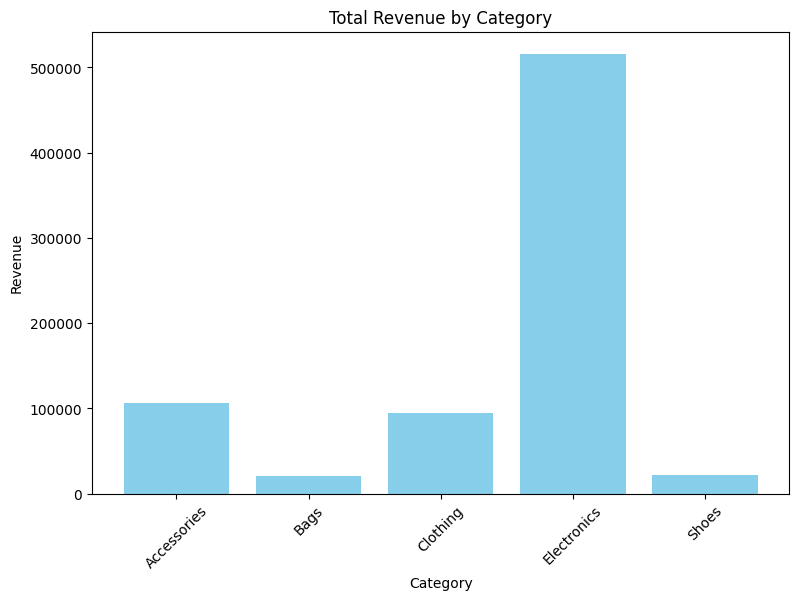

In [27]:
# Plot total revenue by category
plt.figure(figsize=(9, 6))
plt.bar(category_revenue['category'], category_revenue['revenue'], color='skyblue')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Step-09: Total Quantity Sold


In [28]:
# Calculate the total quantity of products sold
total_quantity = df['quantity'].sum()
total_quantity

5341

## Step-10: Product Revenue Analysis

In [29]:
# Group by 'product' and calculate total revenue for each product
product_revenue = df.groupby('product')['revenue'].sum().reset_index()
product_revenue

,product,revenue
0,Backpack,20400
1,Coat,33800
2,Headphones,18000
3,Hoodie,19800
4,Jeans,20650
5,Laptop,6000
6,Smartphone,434400
7,Smartwatch,60800
8,Sneakers,21600
9,Speaker,39680


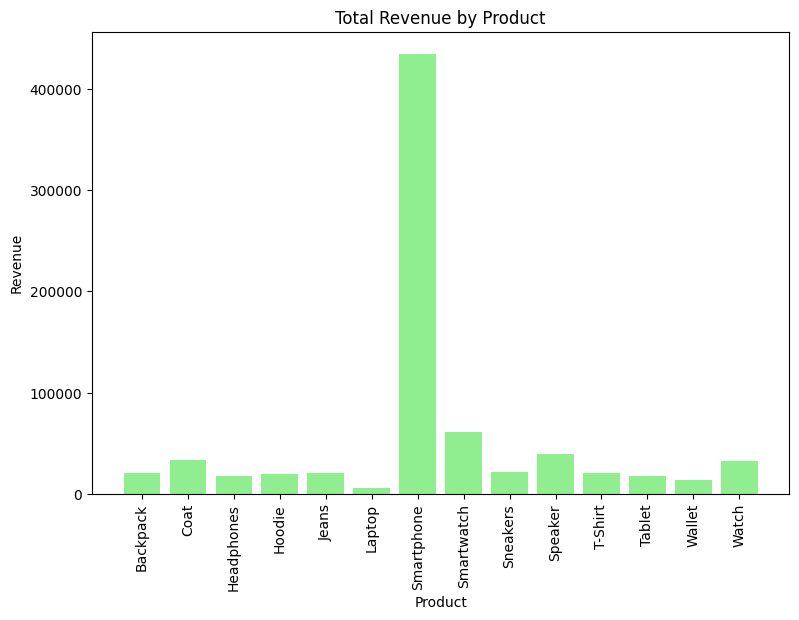

In [30]:
# Plot total revenue by product
plt.figure(figsize=(9, 6))
plt.bar(product_revenue['product'], product_revenue['revenue'], color='lightgreen')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

## Step-11: Average price of products 

In [31]:
# Calculate the average price of products sold
average_price = df['price'].mean()
average_price

211.0326086956522

## Step-12: Average Revenue per Sale

In [32]:
# Calculate the average revenue per sale
average_revenue_per_sale = df['revenue'].mean()
average_revenue_per_sale

2062.853260869565

## Step-13: Quarterly Revenue Analysis

In [33]:
# Extract the quarter from the 'date' column
df['quarter'] = df['date'].dt.to_period('Q')

# Group by 'quarter' and calculate total revenue for each quarter
quarterly_revenue = df.groupby('quarter')['revenue'].sum().reset_index()
quarterly_revenue

,quarter,revenue
0,2022Q1,182100
1,2022Q2,185970
2,2022Q3,197680
3,2022Q4,193380


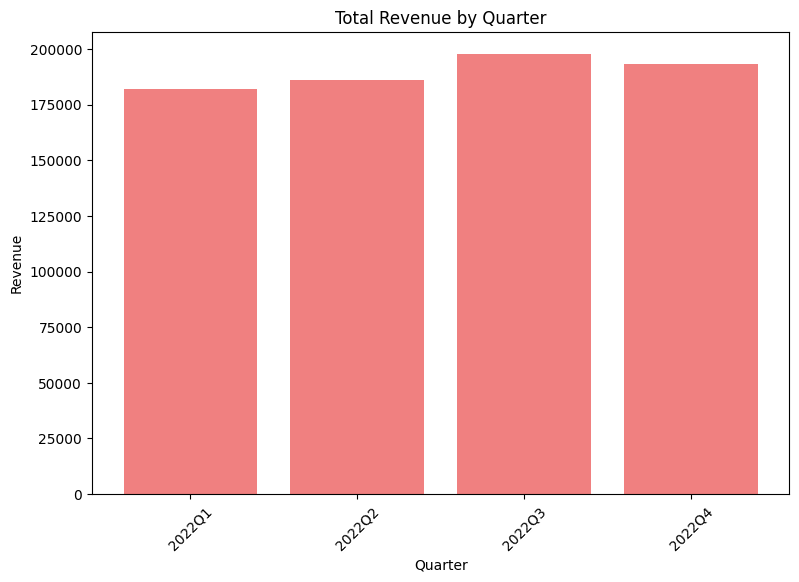

In [34]:
# Plot total revenue by quarter
plt.figure(figsize=(9, 6))
plt.bar(quarterly_revenue['quarter'].astype(str), quarterly_revenue['revenue'], color='lightcoral')
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Conclusions:
* The total revenue generated from the sales data is **$759,130**.
* The sales data spans from **January 1, 2022, to December 31, 2022**.
* The highest revenues were recorded in **May and July (both $69,510)**, and the lowest revenue was recorded in **February ($53,740)**.
* Revenue generally remains above **$50,000 each month**, indicating stable sales performance throughout the year.
* **Electronics dominate revenue generation, followed by Accessories and Clothing**, while Shoes and Bags generate the least revenue.
* The total quantity of products sold in the year is **5,341**.
* **Smartphones are the highest revenue generators at $434,400, followed by Smartwatches and Speakers**, while Laptops and Wallets have the lowest revenue.
* The average price of products sold is **$211.03**.
* The average revenue per sale is **$2,062.85**.
* Revenue shows a steady increase from **Q1 to Q3, peaking at $197,680 in Q3**, with a slight dip in **Q4 to $193,380**.